# 趋势突破策略与期权——以Dual Thrust为例

## 引言

&emsp;&emsp;在程序化交易中，趋势交易是最主要的交易方式，如果我们能想办法抓住这个趋势，就能够获得这部分趋势行情的收益。那么如何能够抓住趋势呢？最简单常用的一种方式就是均线，我们认为当短期均线向上突破长期均线时，接下来行情将上涨；反之，短期均线向下突破长期均线时认为行情将下跌。以这种方式来预估未来趋势，这就是常用的突破策略。突破策略通常是价格向上突破设定的价格（称为上轨）时认为是上涨趋势则做多，或者向下突破设定的下轨认为是下跌趋势则做空。本文我们将十大经典交易策略中的Dual Thrust应用在期权上，来获得期权行情上涨下跌的收益，形成一个简单有效的策略。Dula Thrust是一种非常经典的趋势跟踪策略，在实际中取得过极其优秀的效果。而期权具有明显的尖峰厚尾效应，同时具有很高的杠杆，是一种非常适合投机交易的资产。

## 期权策略

### Dual Thrust策略

&emsp;&emsp;在金融衍生品策略当中，最主要的投机策略就是趋势策略。资产价格变动的方向是趋势策略进行趋势跟踪的依据，总的来说，在股指期货和商品期货上，具有“低胜率高盈亏比”的特点，具有显著的盈利机会。经典的CTA趋势策略就是开盘区间突破策略。通常情况下，突破策略进场做多是在股指期货价格高于某个价位的时候，同理进场做空就是低于某个价位的时候。区间突破策略的一个典型指的就是开盘区间突破策略。其突破价格的计算是：突破上界=当日开盘价+区间宽度值，突破下界=开盘价-区间宽度值。计算区间宽度是有很多种方法的，本文选取经典的Dual Thrust策略来计算区间，之后再乘上由样本内优化获得的系数 $K$来确定。系数 $K$包含上轨系数$Ks$和下轨系数$Kx$。  
&emsp;&emsp;Dual Thrust是一个趋势跟踪系统，由Michael Chalek在20世纪80年代开发，曾被Future Thruth杂志评为最赚钱的策略之一。Dual Thrust系统具有简单易用、适用度广的特点，其思路简单、参数很少，配合不同的参数、止盈止损和仓位管理，可以为投资者带来长期稳定的收益，被投资者广泛应用于股票、货币、贵金属、债券、能源及股指期货市场等。在Dual Thrust交易系统中，对于震荡区间的定义非常关键，这也是该交易系统的核心和精髓。Dual Thrust趋势系统使用  $$Range = Max(HH-LC,HC-LL)$$  来描述震荡区间的大小。其中$HH$是N日最大的最高价，$LC$是N日最低的收盘价，$HC$是N日最大的收盘价，$LL$是N日最小的最低价。  
&emsp;&emsp;当价格向上突破上轨时，如果当时持有空仓，则先平仓，再开多仓；如果没有仓位，则直接开多仓；  
&emsp;&emsp;当价格向下突破下轨时，如果当时持有多仓，则先平仓，再开空仓；如果没有仓位，则直接开空仓。
<img src="http://img0.ph.126.net/hGIFYliICAa0l0n_EQXEaw==/6631238190003744507.jpg" />

### 合约选择

&emsp;&emsp;和股指期货相比，期权的不同点就在于：在同一时间市场上进行交易的，有很多行权价格和行权日期不一样的认购期权和认沽期权。不一样的期权交易量和成交量有着非常大的区别，其中一部分期权的流动性很差。所以在交易之前，我们需要在每一个交易日里挑选出适合的期权合约。总的原则是个选择流动性好的期权，期权流动性强弱的判断指标就是持仓量和成交量。一般来说期权的当月合约具有较大的成交量和持仓量，具有的流动性最好，所以我们选择当月合约。  
&emsp;&emsp;此外，我们知道期权总共包含两大类：认沽期权和认购期权。按行权价格的不同可以被分成实值期权、平值期权、虚值期权。对认沽期权来说，行权价低于标当前价格的期权叫做虚值期权，高于标的价格的期权叫做实值期权，而与标的价格最接近的期权叫做平值期权；与之相反，认购期权行权价高于标的当前价格的期权叫做虚值期权，高低于标的价格的期权叫做实值期权，与标的价格最接近的期权叫做平值期权。因此我们能够将期权区分为6大类，分别是：平值认购、平值认沽、虚值认购、虚值认沽、实值认购、实值认沽。在接下的实验验证中，我们对这些合约进行回测，找出效果最好的合约类型。

### 交易信号

&emsp;&emsp;区间突破策略利用历史数据来预测未来的走势。一般来说，预测的标的与交易的资产应该相同。但是由于期权价格常常剧烈变化，日内波动太大，容易出现“假”突破信号，影响趋势判断的方向，发出错误的交易信号，对整个策略影响很大。而50ETF期权的标的日内价格相对于期权价格走势更加平稳，不容易产生假信号。因此选用50ETF产生突破信号，然后交易50ETF期权。

### 风险控制

&emsp;&emsp;一般情况下，趋势策略和择时策略通过设置止损的方式来降低风险。因为期权的波动非常大，通常情况下合理的止损阈值会很大，不然容易触发止损平仓，可是一旦在这样会致使单次交易对净值造成的亏损非常大。所以为了单次交易对净值的影响尽可能降低，本文利用降低仓位的方法进行风险控制。具体做法是，在每次交易的时候，最多占用资金的10%给期权做权利金。当然这样的话买入期权就会有90%的资金处于闲置状态；但是对于卖出期权的交易，交易保证金用剩余现金就充足了。因此通过控制仓位，使得单次交易的净值波动不会太大。

## 研究内容

&emsp;&emsp;我们选择的交易时间是从2017-1-1到2019-5-20，将这个时间段划分为样本内（2017-1-1至2018-5-20）和样本外（2018-5-21-2019-5-20），接下来的研究我们统统选择在样本内进行分析。  
&emsp;&emsp;首先，我们进行期权交易的可行性分析。由于50ETF价格每日变化，每日的期权合约也有可能变化，所以我们首先将每日的期权合约代码取下来，存放在三个列表中，分别是：平值期权合约列表（Code_atm）,实值期权合约列表（Code_itm），虚值期权合约列表（Code_otm)。每个列表包含两列，第一列是看涨期权代码，第二列是看跌期权代码。实值期权与虚值期权分别只取除平值外实一档或者虚一档的期权。代码如下：

In [1]:
# 风险及免责提示：该策略由聚宽用户在聚宽社区分享，仅供学习交流使用。
# 原文一般包含策略说明，如有疑问请到原文和作者交流讨论。
# 原文网址：https://www.joinquant.com/view/community/detail/dfd5f024a34d241072511f42f4fc2d27?type=1
# 标题：趋势突破策略与期权——以Dual Thrust为例

import warnings
import matplotlib 
import numpy as np
import pandas as pd
import datetime as dt
from jqdata import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')  #过滤代码运行过程中烦人的警告
matplotlib.rcParams['axes.unicode_minus']=False #解决画图中负数显示问题

In [2]:
def option_code(df,price,ContractType):
    df=df.sort_values(by='StrikePrice')
    df=df.reset_index()
    df.loc[:,'StrikePrice']=abs(df.loc[:,'StrikePrice']-price)
    idx=df.loc[:,'StrikePrice'].idxmin()
    code=df.loc[idx-1:idx+1,'ContractCode'].values
    if ContractType=='p':
        code=code[::-1]
    return code
def get_option_code(date):
    price=get_price('510050.XSHG',count=1,end_date=date,fq='none',fields=['open'])['open'].values[0]
    q=query(jy.Opt_DailyPreOpen).filter(jy.Opt_DailyPreOpen.TradingDate==date,jy.Opt_DailyPreOpen.ULAName=='50ETF')
    df=jy.run_query(q)
    df=df.loc[:,['ContractCode','TradingCode','StrikePrice','ExerciseDate']]
    df=df[df['ExerciseDate']==df['ExerciseDate'].min()].reset_index()
    row,col=df.shape
    if row>0:
        for i in range(row):
            scode=df.loc[i,'TradingCode']
            if scode[6]=='C' and scode[11]=='M':
                df.loc[i,'CP']='c'
            elif scode[6]=='P' and scode[11]=='M':
                df.loc[i,'CP']='p' 
        df1=df[df['CP']=='c']
        df2=df[df['CP']=='p']
        code1=option_code(df1,price,'c')
        code2=option_code(df2,price,'p')
        code1=[str(code)+'.XSHG' for code in code1]
        code2=[str(code)+'.XSHG' for code in code2]
        return code1,code2
    else:
        print(date,'这一天取不到期权合约！！')
        return 'None','None'  

In [3]:
###运行时间约1分钟，耐心等待！！

Code_itm=[] ###实值期权代码列表
Code_atm=[] ###平值期权代码列表
Code_otm=[] ###虚值期权代码列表
trade_days=get_trade_days('2017-1-1','2018-5-20')
for k,date in enumerate(trade_days[:]):
    code_c,code_p=get_option_code(date)
    Code_itm.append([code_c[0],code_p[0]])
    Code_atm.append([code_c[1],code_p[1]])
    Code_otm.append([code_c[2],code_p[2]])
print('运行完毕！')

2017-11-28 这一天取不到期权合约！！
运行完毕！


In [4]:
Code_itm[0]  ###2017-1-3的实值认购，实值认沽期权代码

['10000817.XSHG', '10000783.XSHG']

### 一、可行性分析

&emsp;&emsp;期权是一种高杠杆的资产，其价格与标的价格有明显的正/负相关关系，且日内涨跌幅的分布具有明显的厚尾现象，非常适合投机。但是期权合约种类繁多，不好选择。本文在这里做一个简单的分析，以便帮助大家有一个更加直观的了解。


&emsp;&emsp;首先我们知道，认购期权的价格变动与标的价格的变动具有正相关关系；认沽期权的价格变动与标的价格的变动具有负相关关系。但不同执行价的期权（实值、平值、虚值）与ETF日内价格的相关系数却有所不同，下面分析了6种期权与50ETF日内价格的相关系数。从图上可以看出，对于认购的平值与实值期权在绝大部分交易日都与标的呈现正相关性，而认购虚值期权不一定能够保证正相关关系，这是因为虚值期权的价格有时候过于便宜，日内日波动很大。同样地对于认沽的平值与实值期权在绝大部分交易日都与标的呈现负相关性，虚值期权不一定能够保证负相关关系，其原因与认购期权相同，都是虚值期权价格过于便宜，日内价格波动太大。下图分析了不同的期权与50ETF的日内相关系数。

   注：此处平值期权指期权的行权价与50ETF的开盘价最接近的期权，实值与虚值分别指最接近平值的实值与虚值期权。

In [5]:
Corr=[]
for k,date in enumerate(trade_days[:]):
    ###样本内有一个交易日取不到期权合约，需要异常处理
    try:
        corr=[]
        code=Code_itm[k]+Code_atm[k]+Code_otm[k]
        code.append('510050.XSHG')
        price=get_price(code,start_date=date,end_date=date+dt.timedelta(days=1),frequency='5m',fq='none',fields=['close'])['close']
        etf_price=pd.Series(price.iloc[:,6].values)
        for i in range(6):
            p1=pd.Series(price.iloc[:,i].values)
            corr.append(etf_price.corr(p1))
        Corr.append(corr)
    except:
        pass

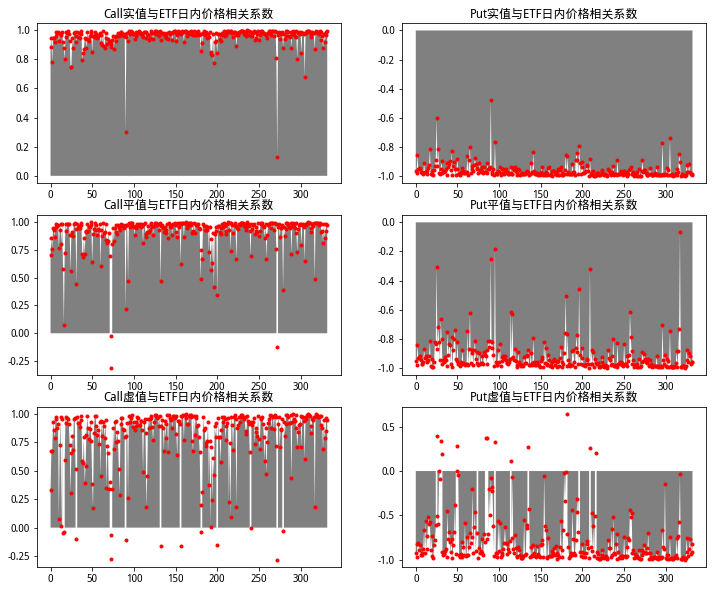

In [6]:
Title=['Call实值','Put实值','Call平值','Put平值','Call虚值','Put虚值']
plt.figure(figsize=(12,10))
x=list(range(len(Corr)))
for k in range(6):
    a=321+k
    plt.subplot(a)
    y=np.array([i[k] for i in Corr])
    plt.plot(x,y,'r.')
    if k%2==0:
        plt.fill_between(x,y,where=(y>0), facecolor='gray')
    else:
        plt.fill_between(x,y,where=(y<0), facecolor='gray')
    plt.title(Title[k]+'与ETF日内价格相关系数')
plt.show()

&emsp;&emsp;然后我们对这六种期权的日内收益进行分析，下图是这六种期权的日内收益直方图和统计数据。从图上和统计结果来看，很明显地峰度大于3，期权的日内收益呈厚尾分布。偏度大于0，则说明分布右偏。

In [7]:
Returns=[]
for k,date in enumerate(trade_days[:]):
    ###样本内有一个交易日取不到期权合约，需要异常处理
    try:
        code=Code_itm[k]+Code_atm[k]+Code_otm[k]
        code.append('510050.XSHG')
        price1=get_price(code,end_date=date,count=1,frequency='1d',fq='none',fields=['open'])['open']
        price2=get_price(code,end_date=date,count=1,frequency='1d',fq='none',fields=['close'])['close']
        returns=(price2-price1)/price1
        Returns.append(returns.values[0])
    except:
        pass

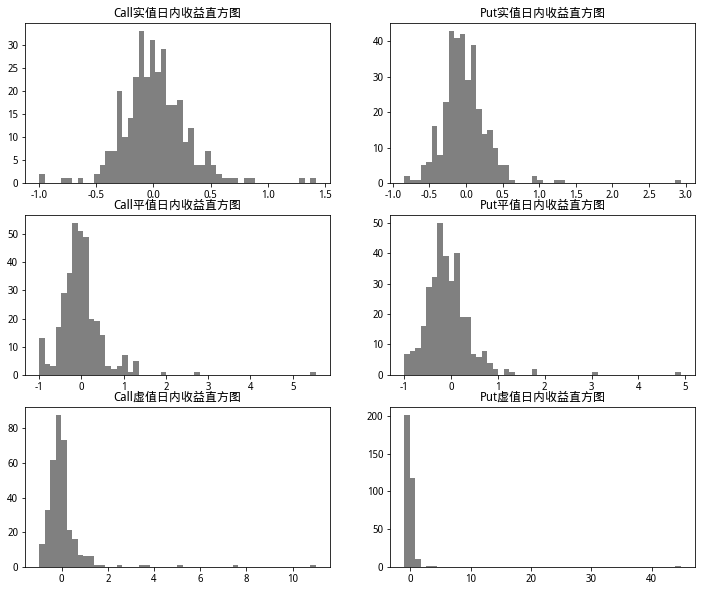

期权日内收益统计


,Call实值,Put实值,Call平值,Put平值,Call虚值,Put虚值
均值,0.0123144,-0.0159625,-0.00494975,-0.0591066,0.0375117,0.00376648
方差,0.0777391,0.109711,0.307742,0.283521,0.913325,6.35001
偏度,0.578489,2.62401,3.6837,3.37458,6.94974,17.1073
峰度,3.61003,19.6465,31.5422,25.76,66.1716,304.86


In [8]:
plt.figure(figsize=(12,10))
plt.grid()
Stat=pd.DataFrame(columns=['均值','方差','偏度','峰度'],index=Title)
for k in range(6):
    a=321+k
    plt.subplot(a)
    y=[i[k] for i in Returns]
    y=pd.Series(y)
    Stat.iloc[k,:]=[y.mean(),y.var(),y.skew(),y.kurt()]
    plt.hist(y,50,color='gray')
    plt.title(Title[k]+'日内收益直方图')

plt.show()
print('期权日内收益统计')
Stat.T

&emsp;&emsp;接下来我们定义期权的日内收益与标的的日内收益之比作为有效杠杆，用以统计期权与标的日内涨跌幅的变动关系。$$有效杠杆=\frac{\Delta P/P}{\Delta S/S}$$  
&emsp;&emsp;从如下的统计结果来看，对于认购的实值、平值、虚值期权它们的均值都大于0，再次说明认购期权日内价格与标的价格变化呈正相关关系；同理，认沽的实值、平值、虚值期权它们的均值都小于0，说明认沽期权日内价格与标的价格变化呈负相关关系。并且对于认沽和认购期权的有效杠杆统计的均值绝对值都远大于1，说明期权交易具有高杠杆性，是一种非常适合投机交易的资产。  
&emsp;&emsp;综上所述，期权价格变化与标的变化具有明显的正/负相关关系，日内收益具有明显的厚尾现象，且具有高杠杆，是一种非常适合进行投机交易的品种。

In [9]:
Returns=[]
for k,date in enumerate(trade_days[:]):
    ###样本内有一个交易日取不到期权合约，需要异常处理
    try:
        code=Code_itm[k]+Code_atm[k]+Code_otm[k]
        code.append('510050.XSHG')
        price1=get_price(code,end_date=date,count=1,frequency='1d',fq='none',fields=['open'])['open']
        price2=get_price(code,end_date=date,count=1,frequency='1d',fq='none',fields=['close'])['close']
        returns=(price2-price1)/price1
        returns=returns/(returns.values[0][-1])
        returns1=[str(i) for i in returns.values[0]]
        if '-inf' not in returns1:###排除相除无穷大情况
            Returns.append(returns.values[0])
    except:
        pass

In [10]:
Stat=pd.DataFrame(columns=['均值','方差','偏度','峰度'],index=Title)
for k in range(6):
    y=[i[k] for i in Returns]
    y=pd.Series(y)
    Stat.iloc[k,:]=[y.mean(),y.var(),y.skew(),y.kurt()]
Stat.T

,Call实值,Put实值,Call平值,Put平值,Call虚值,Put虚值
均值,34.8591,-28.5593,63.423,-36.2637,71.3346,-29.8752
方差,5662.43,10839.6,31474.2,32214,48763.9,89520.1
偏度,-6.17976,9.44397,1.1741,6.57285,2.12947,4.72304
峰度,104.037,131.373,24.8021,67.6297,27.6835,82.3493


### 二、Dual Thrust策略在期权上的应用

### 策略步骤

1、区间宽度。在开盘前选择合适的参数，获取50ETF历史数据利用Dual Thrust策略计算50ETF当日的区间宽度$Range$；  
2、上轨和下轨。开盘时获得50ETF开盘价$Open$，加上区间宽度得到上轨,即$UpPrice=Open+Ks*Range$,或者减去区间宽度得到下轨$DownPrice=Open-Kx*Range$；  
3、期权合约。开盘时，根据50ETF的开盘价$Open$和各个期权的行权价格$StrikePrice$，选择合适的期权；  
4、突破信号。对50ETF价格$Price$实时监测，当$Price>UpPrice$时，价格向上突破，认为是上涨行情，此时应该做多认购期权或者做空认沽期权；反之，$Price<DownPrice$时，价格向下突破，认为将出现下跌趋势，应该做多认沽期权或者做空认购期权；  
5、持仓数量。根据上文提到的风险控制方法，每次只买入或者卖出价值仓位10%的期权。例如此时总仓位价值10000元，买入期权价格为0.0250(即250元/张)，则只能买入$10000*0.1/250=4$（张）；如果是做空期权，也按这样的方法处理。因为做空期权需要保证金，剩余的90%资金作为做空期权的保证金。  
6、收盘平仓。不管收盘时的盈亏，全部平仓。然后第二天重复以上步骤。


### 回测代码

&emsp;&emsp;我们按上面提到的策略步骤编写回测代码。在回测过程中有一些因素影响最终的收益效果，以下我们分别对这些因素进行分析，选出最优的因素进行组合，然后在样本外进行测试。这里取样本内时间为：2017-1-1到2018-5-20。需要考虑的因素包括： 
  
1、期权合约行权价格。期权种类繁多，但这里我们只取行权价与标的开盘价最接近的三个期权，包括平值期权、实值期权和虚值期权。  
2、买入卖出方式。由于有认沽和认购两类期权合约，所以在向上突破时既可以做多认购也可以做空认沽；反过来向下突破时既可以做空认购也可以做多认沽。因此一共形成四类组合方式，向上买入认购或者卖出认沽、向下卖出认购或者买入认沽；  
3、Dual Thrust策略的参数，包括历史数据天数Num,上下轨系数$Ks$、$Kx$；  
4、手续费。默认设置为0.0005（即5元/张）。 
  
&emsp;&emsp;以下是回测代码框架，初始资金为10000元。首先默认状态设置为取当月实值期权合约，向上突破做多认购期权，向下突破做空认购期权。Dual Thrust默认参数设置为Num=3,k1=0.3,k2=0.3，手续费设置为0.0005。基于需要调整的因素改动相应代码即可，以下为各因素分析结果。

In [11]:
###计算每天的上下轨
def Price_Range(date,parameters):
    price = get_price('510050.XSHG',end_date=date,count=parameters[0]+1,fq='none',fields=['open','high','low','close'])
    HH=max(price['high'].values[:-1])
    HC=max(price['close'].values[:-1])
    LC=min(price['close'].values[:-1])
    LL=min(price['low'].values[:-1])
    Range = max(HH-LC,HC-LL)
    p     = price.iloc[-1,0]
    p_up  = round(p+parameters[1]*Range,3)
    p_down= round(p-parameters[2]*Range,3)
    return p_up,p_down 
###计算总收益TR、年华收益AR、波动率Vo、夏普比SR、最大回撤MD
def Indicators(value):
    value=list(value)
    TR=value[-1]-1
    AR=pow(value[-1],252/len(value))-1
    value=pd.Series(value)
    Returns=value.pct_change(1).dropna()
    Vo=sqrt(Returns.var()*252)
    SR=AR/Vo
    drawback=[]
    for i,v in enumerate(value):
        drawback.append(max(1-value[i:]/v))
    MD=max(drawback)
    return TR*100,AR*100,Vo*100,SR,MD*100

In [12]:
##策略函数。
'''
输入参数：
Type     : 字符串类型，表示期权合约类型。包括'itm'(实值期权)，'atm'(平值合约)，'otm'(虚值合约)。
flag     : 列表。包含两个元素，形成买入卖出方式。第1个元素：向上突破时买入（'Buy'）还是卖出('Sell');第2个元素:向下突破时买入('Buy')还是卖出('Sell')。(
cost     : 单边手续费，默认为0.0005（5元/张）。
DualPara : Dual Thrust参数列表。第1个元素为历史天数Num，第2个为向上突破系数Ks,第3个为向下突破系数Kx。
period   : 是否为样本内测试。可选参数：样本内:'inSample'，样本外：'outSample'，全样本：'allSample'。

输出参数：
trade_days:交易日列表，主要为画图时所用。
value     :每日净值列表。
'''
def option_strategy(Type='itm',flag=['Buy','Sell'],DualPara=[3,0.3,0.3],cost=0.0005,period='inSample'):
    
    LSflag=0               ###突破信号标志位，默认为0，向上突破置为1，向下突破置为-1。
    value=[10000]          ###资金净值列表，初始资金为10000元
    u_code='510050.XSHG'   ###标的50ETF代码
    
    if   period=='inSample':
        trade_days=get_trade_days('2017-01-01','2018-5-20')
    elif period=='outSample':
        trade_days=get_trade_days('2018-05-21','2019-5-20')
    elif period=='allSample':
        trade_days=get_trade_days('2017-01-01','2019-5-20')
        
    for k,date in enumerate(trade_days[:]):
        
        code_c,code_p=get_option_code(date)
        
        ###认购合约代码:c_code,认沽合约代码:p_code
        if Type=='itm':
            c_code,p_code=code_c[0],code_p[0] ###实值期权
        elif Type=='atm':
            c_code,p_code=code_c[1],code_p[1] ###平值期权
        elif Type=='otm':
            c_code,p_code=code_c[2],code_p[2]  ###虚值期权

        if len(c_code)<6 or len(p_code)<6:###不能取得正确期权合约代码时，跳过这一天
            value.append(value[-1])
            continue

        code=[u_code,c_code,p_code]  ###需要取得数据的证券代码

        p_up,p_down = Price_Range(date,DualPara) ###突破的上下轨

        ###取得当天50ETF、认购合约、认沽合约的1分钟数据，第一列为50ETF,第二列为认购合约，第三列为认沽合约
        sta_date=date
        end_date=date+dt.timedelta(days=1)
        price=get_price(code,sta_date,end_date,frequency='1m',fq='none',fields=['close'])['close']

        ###判断每分钟50ETF收盘价是否突破，向上突破LSflag置为1，向下突破LSflag置为-1，否则继续为0
        for i in range(len(price)):
            p =price.iloc[i,0]###50ETF每分钟收盘价
            if LSflag==0:

                ###向上突破
                if p>p_up:
                    LSflag=1
                    ###向上突破买入认购
                    if flag[0]=='Buy':
                        c1=price.iloc[i,1] ###突破时认购期权的价格
                        c2=price.iloc[-1,1]###收盘时认购期权的价格
#                         print(c_code,price.index[i])
                    ###向上突破卖出认沽
                    elif flag[0]=='Sell':
                        c1=price.iloc[i,2] ###突破时认沽期权的价格
                        c2=price.iloc[-1,2]###收盘时认沽期权的价格
#                         print(p_code,price.index[i])
                    break   ###一旦今天有突破信号，则不再继续判断。突破时做多收盘时平仓即可

                ###向下突破
                elif p<p_down:
                    LSflag=-1
                    if flag[1]=='Buy':
                        c1=price.iloc[i,2] ###突破时认沽期权的价格
                        c2=price.iloc[-1,2]###收盘时认沽期权的价格
#                         print(p_code,price.index[i])
                    elif flag[1]=='Sell':
                        c1=price.iloc[i,1]  ###突破时认购期权的价格
                        c2=price.iloc[-1,1] ###收盘时认购期权的价格
#                         print(c_code,price.index[i])
                    break    

        ###计算每日收益，净值存放在value列表里  

        if   LSflag== 1 :
            num=int(value[-1]*0.1/c1/10000) ###投入总金额10%，计算张数。
            if flag[0]=='Buy':
                profit=(c2-c1-2*cost)*10000   
            elif flag[0]=='Sell':
                profit=(c1-c2-2*cost)*10000
            value.append(value[-1]+num*profit) ###每日净值

        elif  LSflag==-1:
            num=int(value[-1]*0.1/c1/10000) 
            if flag[1]=='Buy':
                profit=(c2-c1-2*cost)*10000
            elif flag[1]=='Sell':
                profit=(c1-c2-2*cost)*10000
            value.append(value[-1]+num*profit) 
            
        else:
            num=0
            c1,c2=0,0
            value.append(value[-1])
 
        LSflag=0   
#         print(c1,c2,num,value[-1])
    value=[i/value[0] for i in value]
    return trade_days,value

In [13]:
###运行需要大概1分钟，耐心等待！！
###样本内默认参数回测效果
trade_days,value=option_strategy(Type='itm',flag=['Buy','Sell'],DualPara=[3,0.3,0.3],cost=0.0005,period='inSample')

2017-11-28 这一天取不到期权合约！！


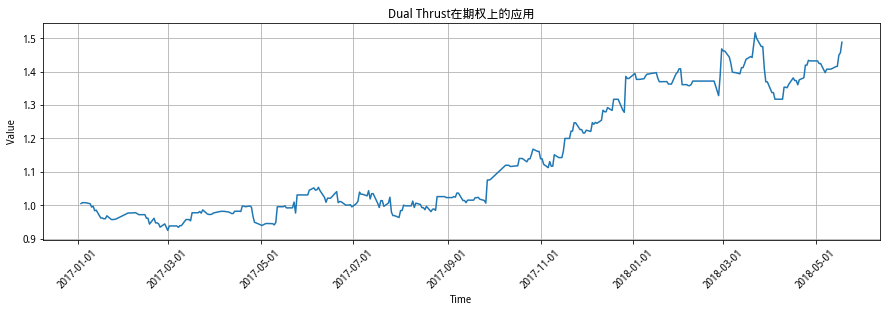

In [14]:
###画图
plt.figure(figsize=(15,4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))###横坐标设置为日期
plt.grid()
plt.xticks(rotation=45)
plt.plot(trade_days,value[1:])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Dual Thrust在期权上的应用')
plt.show()

&emsp;&emsp;以上为回测代码，然后分别改变参数重新回测，比较各因素的影响。

### 三、期权合约

&emsp;&emsp;期权合约按内在价值不同包含平值、实值、虚值合约，这里我们取得三类合约回测，比较其性能。在这里平值期权是执行价格与标的开盘价最接近的合约，对于认购实值是指执行价低于标的开盘价的合约，虚值是执行价高于标的价格的合约。对于认沽期权则恰好相反，虚值期权是价格低于标的价格的合约，实值期权是价格高于标的价格的合约。  
&emsp;&emsp;保持其他参数不变，只更改合约类型，然后运行回测代码比较结果。从图上可以看出，实值期权效果最好，平值次之，虚值最差。这是因为虚值期权价格有时非常便宜，考虑手续费后，手续费占比很高，因此亏损非常厉害。所以不建议选择价格过于便宜的期权。

In [15]:
###运行需要大概2分钟，耐心等待！！
trade_days,value1=option_strategy(Type='itm')###实值期权回测，其他使用默认参数
trade_days,value2=option_strategy(Type='atm')###平值期权回测，其他使用默认参数
trade_days,value3=option_strategy(Type='otm')###虚值期权回测，其他使用默认参数

2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！


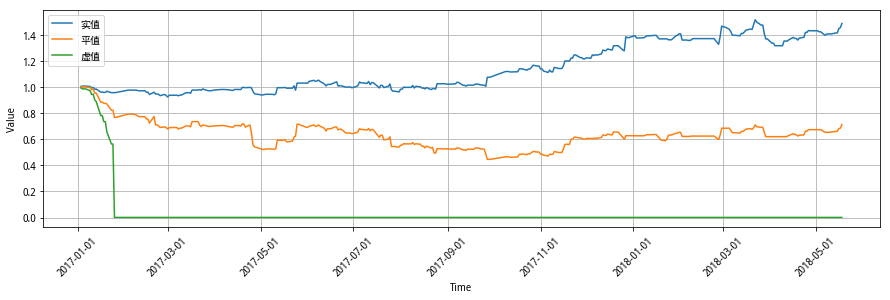

In [16]:
###画图
plt.figure(figsize=(15,4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))###横坐标设置为日期
plt.grid()
plt.xticks(rotation=45)
plt.plot(trade_days,value1[1:],label='实值')
plt.plot(trade_days,value2[1:],label='平值')
plt.plot(trade_days,value3[1:],label='虚值')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### 四、买入卖出

&emsp;&emsp;从上面的讨论可知，向上突破可以买入认购也可以卖出认沽，向下突破可以卖出认购或买入认沽。保持其他参数不变，变换买入卖出方式，比较性能。有四类买入卖出方式：  
1、向上突破买入认购，向下突破卖出认购；  
2、向上突破卖出认沽，向下突破买入认沽；  
3、向上突破买入认购，向下突破买入认沽；  
4、向上突破卖出认沽，向下突破卖出认购。   
&emsp;&emsp;从图上可以看出，向上突破买入认购，向下突破卖出认购净值曲线最高，效果最好；向上突破卖出认沽，向下突破买入认沽净值曲线最低，效果最差。

In [17]:
###运行需要大概2分钟，耐心等待！！
trade_days,value1=option_strategy(flag=['Buy' ,'Sell'])###向上突破买入认购，向下突破卖出认购；
trade_days,value2=option_strategy(flag=['Sell','Buy' ])###向上突破卖出认沽，向下突破买入认沽；
trade_days,value3=option_strategy(flag=['Buy' ,'Buy' ])###向上突破买入认购，向下突破买入认沽；
trade_days,value4=option_strategy(flag=['Sell','Sell'])###向上突破卖出认沽，向下突破卖出认购。

2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！


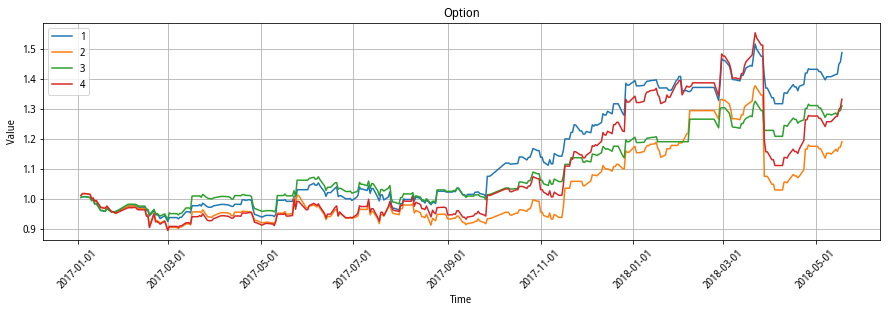

In [18]:
###画图
plt.figure(figsize=(15,4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))###横坐标设置为日期
plt.grid()
plt.xticks(rotation=45)
plt.plot(trade_days,value1[1:],label='1')
plt.plot(trade_days,value2[1:],label='2')
plt.plot(trade_days,value3[1:],label='3')
plt.plot(trade_days,value4[1:],label='4')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Option')
plt.show()

### 五、参数选择

&emsp;&emsp;Dual Thrust策略中包含三个参数，历史数据天数，区间参数f1,f2。接下来我们更改参数，测试回测效果。  首先是历史天数,我们依次选择历史天数为1、2、3、5、8、10，保持区间参数发，f1=f2=0.3不变。从下面的实际验证来看，历史天数取3天能保证最终的收益和净值曲线的波动不会太大。

In [19]:
###运行需要大概3分钟，耐心等待！！
trade_days,value1=option_strategy(DualPara=[1 ,0.3,0.3])
trade_days,value2=option_strategy(DualPara=[2 ,0.3,0.3])
trade_days,value3=option_strategy(DualPara=[3 ,0.3,0.3])
trade_days,value4=option_strategy(DualPara=[5 ,0.3,0.3])
trade_days,value5=option_strategy(DualPara=[8 ,0.3,0.3])
trade_days,value6=option_strategy(DualPara=[10,0.3,0.3])

2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！


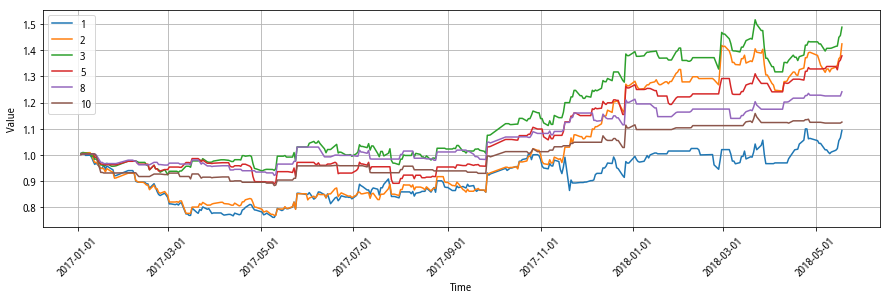

In [20]:
###画图
plt.figure(figsize=(15,4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))###横坐标设置为日期
plt.grid()
plt.xticks(rotation=45)
plt.plot(trade_days,value1[1:],label='1')
plt.plot(trade_days,value2[1:],label='2')
plt.plot(trade_days,value3[1:],label='3')
plt.plot(trade_days,value4[1:],label='5')
plt.plot(trade_days,value5[1:],label='8')
plt.plot(trade_days,value6[1:],label='10')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

&emsp;&emsp;接下来我们分析区间参数f1,f2的值，首先固定历史天数为1天，这里为方便只取f1=f2,分别取值为0.1，0.2，0.3，0.5，回测结果进行比较。如下所示，其中最优的参数是0.3,不过波动比其它参数大些，然后依次是0.5、0.1、0.2。

In [21]:
###运行需要大概2分钟，耐心等待！！
trade_days,value1=option_strategy(DualPara=[3 ,0.1,0.1])
trade_days,value2=option_strategy(DualPara=[3 ,0.2,0.2])
trade_days,value3=option_strategy(DualPara=[3 ,0.3,0.3])
trade_days,value4=option_strategy(DualPara=[3 ,0.5,0.5])

2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！
2017-11-28 这一天取不到期权合约！！


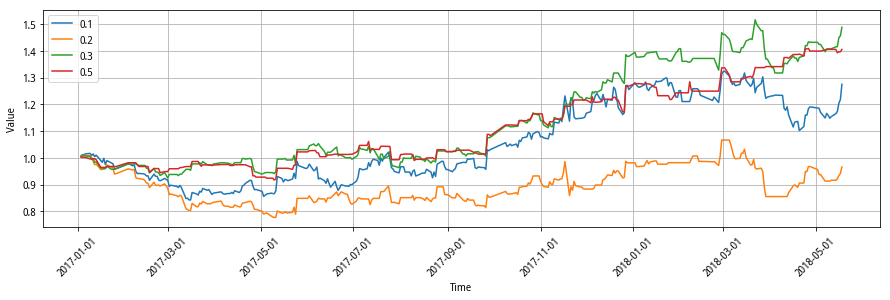

In [22]:
###画图
plt.figure(figsize=(15,4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))###横坐标设置为日期
plt.grid()
plt.xticks(rotation=45)
plt.plot(trade_days,value1[1:],label='0.1')
plt.plot(trade_days,value2[1:],label='0.2')
plt.plot(trade_days,value3[1:],label='0.3')
plt.plot(trade_days,value4[1:],label='0.5')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## 最优结果

&emsp;&emsp;综合以上因素来看，我们选择最优的状态，即选择当月实值期权，向上做多认购，向下做空认购，Dual Thrust参数设置为Num=3,k1=k2=0.3,加上单边手续费0.0005，净值曲线如图。  

总收益：48.81%,年化收益:34.85%,策略波动:22.35%,夏普比:1.56,最大回撤：13.12%


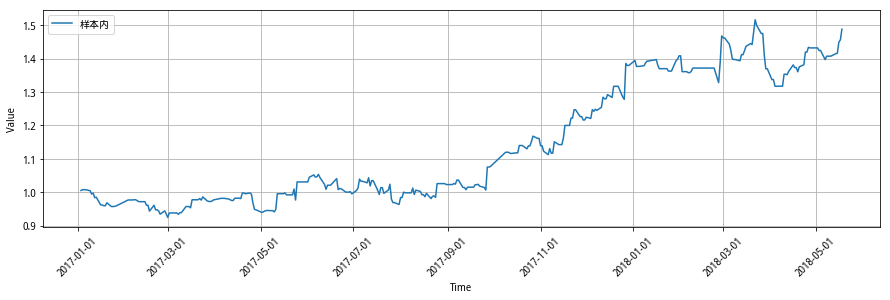

In [30]:
trade_days,value=option_strategy(Type='itm',flag=['Buy','Sell'],DualPara=[3,0.3,0.3],cost=0.0005,period='inSample')
plt.figure(figsize=(15,4))
TR,AR,Vo,SR,MD=Indicators(value)
print('总收益：%.2f%%,年化收益:%.2f%%,策略波动:%.2f%%,夏普比:%.2f,最大回撤：%.2f%%'%(TR,AR,Vo,SR,MD))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.grid()
plt.xticks(rotation=45)
plt.plot(trade_days,value[1:],label='样本内')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()

总收益：146.35%,年化收益:48.15%,策略波动:27.74%,夏普比:1.74,最大回撤：16.54%


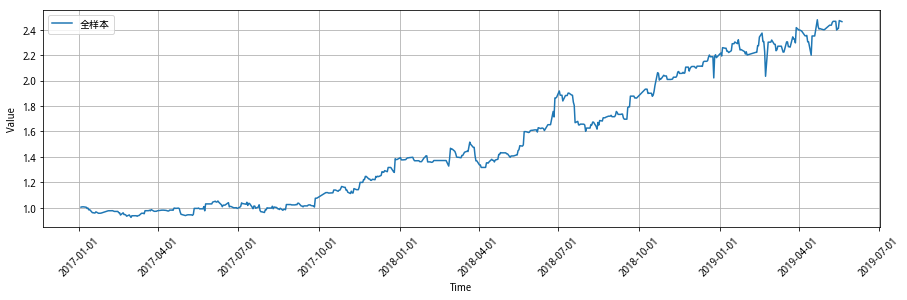

In [33]:
trade_days,value=option_strategy(Type='itm',flag=['Buy','Sell'],DualPara=[3,0.3,0.3],cost=0.0005,period='allSample')
TR,AR,Vo,SR,MD=Indicators(value)
print('总收益：%.2f%%,年化收益:%.2f%%,策略波动:%.2f%%,夏普比:%.2f,最大回撤：%.2f%%'%(TR,AR,Vo,SR,MD))
plt.figure(figsize=(15,4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.grid()
plt.xticks(rotation=45)
plt.plot(trade_days,value[1:],label='全样本')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

2018-12-03 这一天取不到期权合约！！
总收益：45.92%,年化收益:47.74%,策略波动:31.02%,夏普比:1.54,最大回撤：15.35%


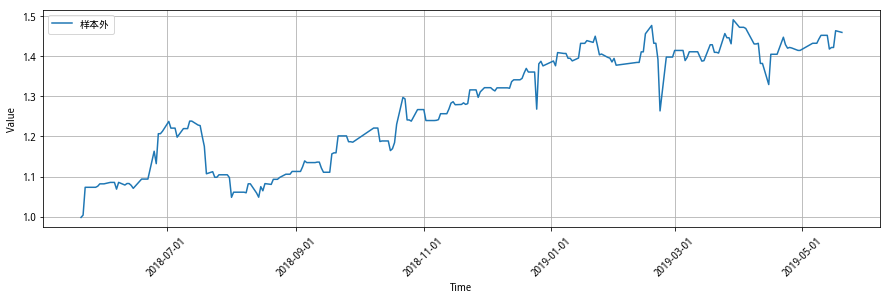

In [34]:
trade_days,value=option_strategy(Type='itm',flag=['Buy','Sell'],DualPara=[3,0.3,0.3],cost=0.0005,period='outSample')
TR,AR,Vo,SR,MD=Indicators(value)
print('总收益：%.2f%%,年化收益:%.2f%%,策略波动:%.2f%%,夏普比:%.2f,最大回撤：%.2f%%'%(TR,AR,Vo,SR,MD))
plt.figure(figsize=(15,4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))###横坐标设置为日期
plt.grid()
plt.xticks(rotation=45)
plt.plot(trade_days,value[1:],label='样本外')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

&emsp;&emsp;样本外表现为上图。从图上看出，样本外表现在大部分时候表现良好。但是有些段回撤非常大，一天内超过15%的亏损，如在2018-7-20，当天选出的期权为“50ETF购2018年7月2.40（10001355.XSHG）”。50ETF当天的开盘价为2.474，收盘价为2.540，涨幅达2.67%。在开盘后第14分钟即9：44时50ETF价格为2.460,突破下轨2.461,认为是下跌趋势，因此卖出认购期权，卖出价格为0.071。但是后续行情中，50ETF基本呈上涨趋势，方向判断错误，因此产生亏损。如下图。

## 总结

&emsp;&emsp;50ETF期权拥有高杠杆，日内收益具有尖峰厚尾效应，是一种非常适合投机的资产。本文主要实验完成了趋势突破策略在50ETF期权上的应用，利用50ETF发出交易信号，买卖50ETF期权。这里我们选择Dual Thrust策略，这是一个在期货上取得优秀效果的策略。通过选择合适的期权合约，调整策略的参数，构建多空组合，形成了一个最优的策略，产生了很高的收益。这说明期权确实有利可图，值得我们更深入的分析。